In [1]:
# import all packages
import os
import sys
import re
import pathlib

In [2]:
# get the path of the file to analyze
fenga_data_eval_path = pathlib.Path().resolve() / 'build' 
binary_name = 'mnist_fp64'
runtime = 'banshee'
id = '109'
file_name = binary_name + '_' + runtime + '_' + id + '.txt'
data_file_path = fenga_data_eval_path / file_name
print(data_file_path)

/scratch1/msc22f11/snitch/sw/applications/build/mnist_fp64_banshee_109.txt


In [26]:
# now we grep for 'FEEDFORWARD'
ff_patrn = 'FEEDFORWARD'
sm_patrn = 'SOFTMAX' 
gr_patrn = 'GRADIENT | GU'
ts_patrn = 'Training Step | TS'

weight_gr_ptrn = 'weight_checksum | weight | W_checksum'
bias_gr_ptrn = 'bias_grads | bias'

weight_ts_ptrn = 'weight_checksum | weight | W_checksum | TS updated weight_checksum'
bias_ts_ptrn = 'bias_grads | bias'

max_iterations = 16
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

feed_fw_images_dict = {}
feed_fw_batches_dict = {}
feed_fw_acc_dict = {}

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(ff_patrn, line, re.IGNORECASE):
            # get the acc with its value
            acc = line.split()[-3:]
            # convert acc to string
            acc = ''.join(acc)
            acc_id = re.search(r"\[(\w+)\]", acc)
            # search for the acc value and check whether it's a float or infinity
            if re.search(r"-?\d+\.\d+", acc):
                acc_val = re.search(r"-?\d+\.\d+", acc)
                acc_val = acc_val.group(0)
                # print(acc_val.group(0))
                # feed_fw_acc.append(acc_val.group(0))
            elif re.search(r"-?\d+\.\d+e\+\d+", acc):
                acc_val = re.search(r"-?\d+\.\d+e\+\d+", acc)
                acc_val = acc_val.group(0)
            else:
                acc_val = acc[-4:]

            print(f'acc[{acc_id.group(1)}] = {acc_val}')   
        
        if re.search(sm_patrn, line, re.IGNORECASE):
            # get the acc with its value
            acc = line.split()[-3:]
            # convert acc to string
            acc = ''.join(acc)
            acc_id = re.search(r"\[(\w+)\]", acc)
            # search for the acc value and check whether it's a float or infinity
            if re.search(r"-?\d+\.\d+", acc):
                acc_val = re.search(r"-?\d+\.\d+", acc)
                acc_val = acc_val.group(0)
            elif re.search(r"-?\d+\.\d+e\+\d+", acc):
                acc_val = re.search(r"-?\d+\.\d+e\+\d+", acc)
                acc_val = acc_val.group(0)
            else:
                acc_val = acc[-4:]

            print(f'softmax[{acc_id.group(1)}] = {acc_val}')
 
        if re.search(gr_patrn, line, re.IGNORECASE):
            if re.search(weight_gr_ptrn, line, re.IGNORECASE):
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"-?\d+\.\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                elif re.search(r"-?\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'weight_gr[{acc_id.group(1)}] = {acc_val}')
                
            elif re.search(bias_gr_ptrn, line, re.IGNORECASE):
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"-?\d+\.\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                elif re.search(r"-?\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'bias_gr[{acc_id.group(1)}] = {acc_val}')

        if re.search(ts_patrn, line, re.IGNORECASE):
            if re.search(weight_ts_ptrn, line, re.IGNORECASE):
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"-?\d+\.\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                    # feed_fw_acc.append(acc_val.group(0))
                elif re.search(r"-?\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'weight_ts[{acc_id.group(1)}] = {acc_val}')

            elif re.search(bias_ts_ptrn, line, re.IGNORECASE):
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity

                if re.search(r"-?\d+\.\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                elif re.search(r"-?\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"-?\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'bias_ts[{acc_id.group(1)}] = {acc_val}')



AttributeError: 'NoneType' object has no attribute 'group'

In [27]:
# now we grep for 'FEEDFORWARD'
ff_patrn = 'FEEDFORWARD'
sm_patrn = 'SOFTMAX'
gr_patrn = 'GRADIENT'
ts_patrn = 'Training Step'

weight_gr_ptrn = 'W_checksum'
bias_gr_ptrn = 'bias_grads'

weight_ts_ptrn = 'weight_checksum'
bias_ts_ptrn = 'bias_grads'

max_iterations = 16
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

feed_fw_images_dict = {}
feed_fw_batches_dict = {}
feed_fw_acc_dict = {}

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(ff_patrn, line, re.IGNORECASE):
            # when we reach the max iterations, we increment the current batch
            if curr_iteration == max_iterations:
                # sort the dict of accuracies by key
                sorted_feed_fw_acc_dict = sorted(feed_fw_acc_dict.items(), key=lambda x: int(x[0]))
                feed_fw_images_dict['image_' + str(curr_image)] = sorted_feed_fw_acc_dict
                curr_image += 1
                curr_iteration = 0
            if curr_image == num_images:
                feed_fw_batches_dict['batch_' + str(curr_batch)] = feed_fw_images_dict
                feed_fw_images_dict = {}
                curr_image = 0
                curr_batch += 1
            # for every match, we increment the current iteration
            curr_iteration += 1
            # get the acc with its value
            acc = line.split()[-3:]
            # convert acc to string
            acc = ''.join(acc)
            acc_id = re.search(r"\[(\w+)\]", acc)
            # search for the acc value and check whether it's a float or infinity
            if re.search(r"\d+\.\d+", acc):
                acc_val = re.search(r"\d+\.\d+", acc)
                acc_val = acc_val.group(0)
                # print(acc_val.group(0))
                # feed_fw_acc.append(acc_val.group(0))
            elif re.search(r"\d+\.\d+e\+\d+", acc):
                acc_val = re.search(r"\d+\.\d+e\+\d+", acc)
                acc_val = acc_val.group(0)
            else:
                acc_val = acc[-4:]

            print(f'acc[{int(acc_id.group(1)) - 1}] = {acc_val}')   
            # add the acc to the list
            feed_fw_acc_dict[int(acc_id.group(1)) - 1] = acc_val

acc[3] = 0.010390
acc[1] = 0.161426
acc[7] = 0.433769
acc[4] = 0.217806
acc[5] = 0.291619
acc[2] = 0.287471
acc[6] = 0.058795
acc[11] = 0.000000
acc[13] = 0.000000
acc[10] = 0.000000
acc[9] = 0.023034
acc[0] = 0.053376
acc[15] = 0.000000
acc[12] = 0.000000
acc[8] = 0.117579
acc[14] = 0.000000
acc[4] = 2.944800
acc[1] = 2.555323
acc[2] = 3.035665
acc[6] = 2.232918
acc[5] = 25.611935
acc[3] = 2.642213
acc[7] = 3.323130
acc[0] = 2.458752
acc[12] = 0.000000
acc[10] = 0.000000
acc[14] = 0.000000
acc[13] = 0.000000
acc[11] = 0.000000
acc[15] = 0.000000
acc[8] = 2.649279
acc[9] = 2.271074
acc[4] = 0.783580
acc[2] = 1.143246
acc[10] = 0.000000
acc[0] = 8.284893
acc[7] = 0.940497
acc[1] = 0.920523
acc[6] = 0.557248
acc[3] = 0.803589
acc[15] = 0.000000
acc[12] = 0.000000
acc[8] = 1.191031
acc[14] = 0.000000
acc[11] = 0.000000
acc[9] = 0.589829
acc[5] = 0.793044
acc[13] = 0.000000
acc[5] = 0.128414
acc[3] = 1.065415
acc[2] = 1.596995
acc[1] = 1.523147
acc[4] = 3.100799
acc[6] = 1.369028
acc[13] =

In [37]:
sm_patrn = 'SOFTMAX '

max_iterations = 10
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

sm_images_dict = {}
sm_batches_dict = {}
sm_act_dict = {}

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(sm_patrn, line, re.IGNORECASE):
            # when we reach the max iterations, we increment the current batch
            if curr_iteration == max_iterations:
                # sort the dict of accuracies by key
                sorted_sm_act_dict = sorted(sm_act_dict.items(), key=lambda x: int(x[0]))
                sm_images_dict['image_' + str(curr_image)] = sorted_sm_act_dict
                curr_image += 1
                curr_iteration = 0
            if curr_image == num_images:
                sm_batches_dict['batch_' + str(curr_batch)] = sm_images_dict
                sm_images_dict = {}
                curr_image = 0
                curr_batch += 1
            # for every match, we increment the current iteration
            curr_iteration += 1
            # get the acc with its value
            acc = line.split()[-3:]
            # convert acc to string
            acc = ''.join(acc)
            acc_id = re.search(r"\[(\w+)\]", acc)
            # search for the acc value and check whether it's a float or infinity
            if re.search(r"\d+\.\d+", acc):
                acc_val = re.search(r"\d+\.\d+", acc)
                acc_val = acc_val.group(0)
            elif re.search(r"\d+\.\d+e\+\d+", acc):
                acc_val = re.search(r"\d+\.\d+e\+\d+", acc)
                acc_val = acc_val.group(0)
            else:
                acc_val = acc[-4:]

            print(f'softmax[{int(acc_id.group(1)) - 1}] = {acc_val}')
            # add the acc to the list
            sm_act_dict[int(acc_id.group(1)) - 1] = acc_val

softmax[0] = 0.094198
softmax[1] = 0.104947
softmax[2] = 0.119044
softmax[3] = 0.090235
softmax[4] = 0.111033
softmax[5] = 0.066713
softmax[6] = 0.084203
softmax[7] = 0.137799
softmax[8] = 0.100444
softmax[9] = 0.091383
softmax[0] = 0.000001
softmax[1] = 0.000010
softmax[2] = 0.000043
softmax[3] = 0.000031
softmax[4] = 0.000053
softmax[5] = 1.000037
softmax[6] = 0.000001
softmax[7] = 0.000014
softmax[8] = 0.000015
softmax[9] = 0.000010
softmax[0] = 0.999018
softmax[1] = 0.000100
softmax[2] = 0.000080
softmax[3] = 0.000113
softmax[4] = 0.000115
softmax[5] = 0.000114
softmax[6] = 0.000144
softmax[7] = 0.000098
softmax[8] = 0.000077
softmax[9] = 0.000140
softmax[0] = 0.925152
softmax[1] = 0.000649
softmax[2] = 0.000603
softmax[3] = 0.001025
softmax[4] = 0.066099
softmax[5] = 0.003383
softmax[6] = 0.000757
softmax[7] = 0.000479
softmax[8] = 0.000746
softmax[9] = 0.001107
softmax[0] = 0.000000
softmax[1] = 0.984573
softmax[2] = 0.000004
softmax[3] = 0.000004
softmax[4] = 0.015401
softmax[5]

In [29]:
gr_patrn = 'GRADIENT | GU'

weight_gr_ptrn = 'W_checksum'

weight_gr_images_dict = {}
weight_gr_batches_dict = {}
weight_gr_act_dict = {}

max_iterations = 16
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(gr_patrn, line, re.IGNORECASE):
            if re.search(weight_gr_ptrn, line, re.IGNORECASE):
                # when we reach the max iterations, we increment the current batch
                if curr_iteration == max_iterations:
                    # sort the dict of accuracies by key
                    sorted_weight_gr_act_dict = sorted(weight_gr_act_dict.items(), key=lambda x: int(x[0]))
                    weight_gr_images_dict['image_' + str(curr_image)] = sorted_weight_gr_act_dict
                    curr_image += 1
                    curr_iteration = 0
                if curr_image == num_images:
                    weight_gr_batches_dict['batch_' + str(curr_batch)] = weight_gr_images_dict
                    weight_gr_images_dict = {}
                    curr_image = 0
                    curr_batch += 1
                # for every match, we increment the current iteration
                curr_iteration += 1
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"\d+\.\d+", acc):
                    acc_val = re.search(r"\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                    # print(acc_val.group(0))
                    # feed_fw_acc.append(acc_val.group(0))
                elif re.search(r"\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'weight_gr[{int(acc_id.group(1))}] = {acc_val}')
                # add the acc to the list
                weight_gr_act_dict[int(acc_id.group(1))] = acc_val

weight_gr[1] = 11.328052
weight_gr[4] = 11.985079
weight_gr[3] = 9.740053
weight_gr[6] = 9.088968
weight_gr[5] = 100.740050
weight_gr[12] = 0.000000
weight_gr[14] = 0.000000
weight_gr[11] = 0.000000
weight_gr[7] = 14.874159
weight_gr[13] = 0.000000
weight_gr[15] = 0.000000
weight_gr[9] = 9.863990
weight_gr[0] = 10.167870
weight_gr[2] = 12.849789
weight_gr[10] = 0.000000
weight_gr[8] = 10.842090
weight_gr[2] = 0.005230
weight_gr[10] = 0.000000
weight_gr[3] = 0.003836
weight_gr[5] = 121.945704
weight_gr[1] = 0.001191
weight_gr[13] = 0.000000
weight_gr[0] = 121.941031
weight_gr[11] = 0.000000
weight_gr[7] = 0.001718
weight_gr[6] = 0.000168
weight_gr[9] = 0.001206
weight_gr[15] = 0.000000
weight_gr[4] = 0.006497
weight_gr[14] = 0.000000
weight_gr[8] = 0.001843
weight_gr[12] = 0.000000
weight_gr[2] = 0.006125
weight_gr[5] = 0.008697
weight_gr[10] = 0.000000
weight_gr[6] = 0.011008
weight_gr[1] = 0.007654
weight_gr[4] = 76.238279
weight_gr[13] = 0.000000
weight_gr[14] = 0.000000
weight_gr[7]

In [30]:
gr_patrn = 'GRADIENT | GU'

bias_gr_ptrn = 'bias_grads | bias'

bias_gr_images_dict = {}
bias_gr_batches_dict = {}
bias_gr_act_dict = {}

max_iterations = 16
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(gr_patrn, line, re.IGNORECASE):
            if re.search(bias_gr_ptrn, line, re.IGNORECASE):
                # when we reach the max iterations, we increment the current batch
                if curr_iteration == max_iterations:
                    # sort the dict of accuracies by key
                    sorted_bias_gr_act_dict = sorted(bias_gr_act_dict.items(), key=lambda x: int(x[0]))
                    bias_gr_images_dict['image_' + str(curr_image)] = sorted_bias_gr_act_dict
                    curr_image += 1
                    curr_iteration = 0
                if curr_image == num_images:
                    bias_gr_batches_dict['batch_' + str(curr_batch)] = bias_gr_images_dict
                    bias_gr_images_dict = {}
                    curr_image = 0
                    curr_batch += 1
                # for every match, we increment the current iteration
                curr_iteration += 1
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"\d+\.\d+", acc):
                    acc_val = re.search(r"\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                    # print(acc_val.group(0))
                    # feed_fw_acc.append(acc_val.group(0))
                elif re.search(r"\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'bias_gr[{int(acc_id.group(1))}] = {acc_val}')
                # add the acc to the list
                bias_gr_act_dict[int(acc_id.group(1))] = acc_val

bias_gr[3] = 0.090235
bias_gr[1] = 0.104947
bias_gr[4] = 0.111033
bias_gr[2] = 0.119044
bias_gr[5] = 0.933287
bias_gr[6] = 0.084203
bias_gr[7] = 0.137799
bias_gr[9] = 0.091383
bias_gr[0] = 0.094198
bias_gr[8] = 0.100444
bias_gr[2] = 0.000043
bias_gr[3] = 0.000031
bias_gr[1] = 0.000010
bias_gr[7] = 0.000014
bias_gr[5] = 1.000037
bias_gr[6] = 0.000001
bias_gr[0] = 0.999999
bias_gr[8] = 0.000015
bias_gr[9] = 0.000010
bias_gr[4] = 0.000053
bias_gr[2] = 0.000080
bias_gr[5] = 0.000114
bias_gr[6] = 0.000144
bias_gr[4] = 0.999885
bias_gr[1] = 0.000100
bias_gr[3] = 0.000113
bias_gr[7] = 0.000098
bias_gr[9] = 0.000140
bias_gr[0] = 0.999018
bias_gr[8] = 0.000077
bias_gr[1] = 0.999351
bias_gr[2] = 0.000603
bias_gr[5] = 0.003383
bias_gr[3] = 0.001025
bias_gr[4] = 0.066099
bias_gr[6] = 0.000757
bias_gr[9] = 0.001107
bias_gr[7] = 0.000479
bias_gr[0] = 0.925152
bias_gr[8] = 0.000746
bias_gr[5] = 0.000000
bias_gr[4] = 0.015401
bias_gr[7] = 0.000002
bias_gr[1] = 0.984573
bias_gr[3] = 0.000004
bias_gr[6]

In [31]:
ts_patrn = 'Training Step | TS'

weight_ts_ptrn = 'weight_checksum'
bias_ts_ptrn = 'bias_grads'


weight_ts_images_dict = {}
weight_ts_batches_dict = {}
weight_ts_act_dict = {}

max_iterations = 16
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(ts_patrn, line, re.IGNORECASE):
            if re.search(weight_ts_ptrn, line, re.IGNORECASE):
                # when we reach the max iterations, we increment the current batch
                if curr_iteration == max_iterations:
                    # sort the dict of accuracies by key
                    sorted_weight_ts_act_dict = sorted(weight_ts_act_dict.items(), key=lambda x: int(x[0]))
                    weight_ts_images_dict['image_' + str(curr_image)] = sorted_weight_ts_act_dict
                    curr_image += 1
                    curr_iteration = 0
                if curr_image == num_images:
                    weight_ts_batches_dict['batch_' + str(curr_batch)] = weight_ts_images_dict
                    weight_ts_images_dict = {}
                    curr_image = 0
                    curr_batch += 1
                # for every match, we increment the current iteration
                curr_iteration += 1
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"\d+\.\d+", acc):
                    acc_val = re.search(r"\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                    # print(acc_val.group(0))
                    # feed_fw_acc.append(acc_val.group(0))
                elif re.search(r"\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'weight_ts[{int(acc_id.group(1))}] = {acc_val}')
                # add the acc to the list
                weight_ts_act_dict[int(acc_id.group(1))] = acc_val


weight_ts[1] = 5.372715
weight_ts[6] = 4.718472
weight_ts[2] = 5.925526
weight_ts[7] = 6.773590
weight_ts[3] = 4.780353
weight_ts[4] = 5.654708
weight_ts[5] = 49.576234
weight_ts[14] = 4.718472
weight_ts[10] = 5.925526
weight_ts[15] = 6.773590
weight_ts[12] = 5.654708
weight_ts[9] = 9.500707
weight_ts[11] = 4.780353
weight_ts[0] = 5.848233
weight_ts[13] = 49.576234
weight_ts[8] = 10.755469
weight_ts[6] = 4.718556
weight_ts[4] = 5.657956
weight_ts[2] = 5.922911
weight_ts[1] = 5.372120
weight_ts[5] = 11.396618
weight_ts[7] = 6.772731
weight_ts[0] = 55.122283
weight_ts[3] = 4.778435
weight_ts[10] = 5.922911
weight_ts[12] = 5.657956
weight_ts[14] = 4.718556
weight_ts[9] = 9.499509
weight_ts[15] = 6.772731
weight_ts[8] = 50.214125
weight_ts[11] = 4.778435
weight_ts[13] = 11.396618
weight_ts[4] = 32.461184
weight_ts[5] = 11.400966
weight_ts[7] = 6.776482
weight_ts[2] = 5.925974
weight_ts[3] = 4.782738
weight_ts[6] = 4.724060
weight_ts[1] = 5.375947
weight_ts[0] = 17.036187
weight_ts[12] = 32

In [32]:
ts_patrn = 'Training Step | TS'
bias_ts_ptrn = 'bias_grads | bias'


bias_ts_images_dict = {}
bias_ts_batches_dict = {}
bias_ts_act_dict = {}

max_iterations = 16
curr_batch = 0
curr_image = 0
curr_iteration = 0
num_images = 9
num_batches = 2

with open(data_file_path, 'r') as f:
    for line in f:
        if re.search(ts_patrn, line, re.IGNORECASE):
            if re.search(bias_ts_ptrn, line, re.IGNORECASE):
                # when we reach the max iterations, we increment the current batch
                if curr_iteration == max_iterations:
                    # sort the dict of accuracies by key
                    sorted_bias_ts_act_dict = sorted(bias_ts_act_dict.items(), key=lambda x: int(x[0]))
                    bias_ts_images_dict['image_' + str(curr_image)] = sorted_bias_ts_act_dict
                    curr_image += 1
                    curr_iteration = 0
                if curr_image == num_images:
                    bias_ts_batches_dict['batch_' + str(curr_batch)] = bias_ts_images_dict
                    bias_ts_images_dict = {}
                    curr_image = 0
                    curr_batch += 1
                # for every match, we increment the current iteration
                curr_iteration += 1
                # get the acc with its value
                acc = line.split()[-3:]
                # convert acc to string
                acc = ''.join(acc)
                acc_id = re.search(r"\[(\w+)\]", acc)
                # search for the acc value and check whether it's a float or infinity
                if re.search(r"\d+\.\d+", acc):
                    acc_val = re.search(r"\d+\.\d+", acc)
                    acc_val = acc_val.group(0)
                elif re.search(r"\d+\.\d+e\+\d+", acc):
                    acc_val = re.search(r"\d+\.\d+e\+\d+", acc)
                    acc_val = acc_val.group(0)
                else:
                    acc_val = acc[-4:]

                print(f'bias_ts[{int(acc_id.group(1))}] = {acc_val}')
                # add the acc to the
                bias_ts_act_dict[int(acc_id.group(1))] = acc_val


bias_ts[1] = 0.080192
bias_ts[6] = 0.058623
bias_ts[0] = 0.017268
bias_ts[2] = 0.044607
bias_ts[7] = 0.052049
bias_ts[3] = 0.031973
bias_ts[4] = 0.029303
bias_ts[5] = 0.472359
bias_ts[14] = 0.000000
bias_ts[9] = 0.014663
bias_ts[10] = 0.000000
bias_ts[15] = 0.000000
bias_ts[12] = 0.000000
bias_ts[11] = 0.000000
bias_ts[13] = 0.000000
bias_ts[8] = 0.042396
bias_ts[6] = 0.058624
bias_ts[1] = 0.080187
bias_ts[4] = 0.029329
bias_ts[2] = 0.044585
bias_ts[5] = 0.027660
bias_ts[7] = 0.052042
bias_ts[0] = 0.482731
bias_ts[3] = 0.031957
bias_ts[12] = 0.000000
bias_ts[10] = 0.000000
bias_ts[14] = 0.000000
bias_ts[9] = 0.014658
bias_ts[13] = 0.000000
bias_ts[8] = 0.042404
bias_ts[15] = 0.000000
bias_ts[11] = 0.000000
bias_ts[4] = 0.470613
bias_ts[6] = 0.058696
bias_ts[2] = 0.044625
bias_ts[1] = 0.080237
bias_ts[5] = 0.027717
bias_ts[7] = 0.052091
bias_ts[3] = 0.032014
bias_ts[0] = 0.016778
bias_ts[12] = 0.000000
bias_ts[13] = 0.000000
bias_ts[10] = 0.000000
bias_ts[15] = 0.000000
bias_ts[11] = 0.

In [33]:
import pandas as pd
df_ff = pd.DataFrame.from_dict({(i,j): feed_fw_batches_dict[i][j] 
                           for i in feed_fw_batches_dict.keys() 
                           for j in feed_fw_batches_dict[i].keys()},
                       orient='index')
df_ff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
"(batch_0, image_0)","(0, 0.053376)","(1, 0.161426)","(2, 0.287471)","(3, 0.010390)","(4, 0.217806)","(5, 0.291619)","(6, 0.058795)","(7, 0.433769)","(8, 0.117579)","(9, 0.023034)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_1)","(0, 2.458752)","(1, 2.555323)","(2, 3.035665)","(3, 2.642213)","(4, 2.944800)","(5, 25.611935)","(6, 2.232918)","(7, 3.323130)","(8, 2.649279)","(9, 2.271074)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_2)","(0, 8.284893)","(1, 0.920523)","(2, 1.143246)","(3, 0.803589)","(4, 0.783580)","(5, 0.793044)","(6, 0.557248)","(7, 0.940497)","(8, 1.191031)","(9, 0.589829)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_3)","(0, 5.739597)","(1, 1.523147)","(2, 1.596995)","(3, 1.065415)","(4, 3.100799)","(5, 0.128414)","(6, 1.369028)","(7, 1.825618)","(8, 1.383756)","(9, 0.988826)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_4)","(0, 3.763149)","(1, 10.872749)","(2, 1.648684)","(3, 1.458274)","(4, 6.714980)","(5, 4.955166)","(6, 0.992718)","(7, 2.036533)","(8, 1.805940)","(9, 1.350949)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_5)","(0, 5.390977)","(1, 10.808688)","(2, 2.560737)","(3, 2.166765)","(4, 9.224728)","(5, 2.849044)","(6, 1.943406)","(7, 2.666978)","(8, 2.260047)","(9, 21.906983)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_6)","(0, 4.524408)","(1, 8.736584)","(2, 11.572585)","(3, 1.306910)","(4, 2.417773)","(5, 4.252768)","(6, 1.622508)","(7, 2.355179)","(8, 1.759499)","(9, 1.575746)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_7)","(0, 9.648942)","(1, 9.805159)","(2, 9.887198)","(3, 3.477822)","(4, 13.617666)","(5, 1.833881)","(6, 2.990557)","(7, 4.652099)","(8, 3.565488)","(9, 10.623510)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_8)","(0, 2.042571)","(1, 11.046708)","(2, 11.362299)","(3, 9.761032)","(4, 9.801496)","(5, 2.746015)","(6, 0.993226)","(7, 1.474334)","(8, 1.141297)","(9, 2.838991)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_1, image_0)","(0, 11.721653)","(1, 4.860104)","(2, 8.174301)","(3, 19.831713)","(4, 9.608033)","(5, 0.028280)","(6, 1.569071)","(7, 1.810957)","(8, 1.529266)","(9, 5.817576)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"


In [34]:
# export the data to a pickle file
import pickle
with open('df_ff_' + str(id) + '.pickle', 'wb') as f:
    pickle.dump(df_ff, f)
    

In [35]:
# load the data from the pickle file
with open('df_ff_' + str(id) + '.pickle', 'rb') as f:
    df_ff_test = pickle.load(f)

df_ff_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
"(batch_0, image_0)","(0, 0.053376)","(1, 0.161426)","(2, 0.287471)","(3, 0.010390)","(4, 0.217806)","(5, 0.291619)","(6, 0.058795)","(7, 0.433769)","(8, 0.117579)","(9, 0.023034)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_1)","(0, 2.458752)","(1, 2.555323)","(2, 3.035665)","(3, 2.642213)","(4, 2.944800)","(5, 25.611935)","(6, 2.232918)","(7, 3.323130)","(8, 2.649279)","(9, 2.271074)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_2)","(0, 8.284893)","(1, 0.920523)","(2, 1.143246)","(3, 0.803589)","(4, 0.783580)","(5, 0.793044)","(6, 0.557248)","(7, 0.940497)","(8, 1.191031)","(9, 0.589829)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_3)","(0, 5.739597)","(1, 1.523147)","(2, 1.596995)","(3, 1.065415)","(4, 3.100799)","(5, 0.128414)","(6, 1.369028)","(7, 1.825618)","(8, 1.383756)","(9, 0.988826)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_4)","(0, 3.763149)","(1, 10.872749)","(2, 1.648684)","(3, 1.458274)","(4, 6.714980)","(5, 4.955166)","(6, 0.992718)","(7, 2.036533)","(8, 1.805940)","(9, 1.350949)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_5)","(0, 5.390977)","(1, 10.808688)","(2, 2.560737)","(3, 2.166765)","(4, 9.224728)","(5, 2.849044)","(6, 1.943406)","(7, 2.666978)","(8, 2.260047)","(9, 21.906983)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_6)","(0, 4.524408)","(1, 8.736584)","(2, 11.572585)","(3, 1.306910)","(4, 2.417773)","(5, 4.252768)","(6, 1.622508)","(7, 2.355179)","(8, 1.759499)","(9, 1.575746)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_7)","(0, 9.648942)","(1, 9.805159)","(2, 9.887198)","(3, 3.477822)","(4, 13.617666)","(5, 1.833881)","(6, 2.990557)","(7, 4.652099)","(8, 3.565488)","(9, 10.623510)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_8)","(0, 2.042571)","(1, 11.046708)","(2, 11.362299)","(3, 9.761032)","(4, 9.801496)","(5, 2.746015)","(6, 0.993226)","(7, 1.474334)","(8, 1.141297)","(9, 2.838991)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_1, image_0)","(0, 11.721653)","(1, 4.860104)","(2, 8.174301)","(3, 19.831713)","(4, 9.608033)","(5, 0.028280)","(6, 1.569071)","(7, 1.810957)","(8, 1.529266)","(9, 5.817576)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"


In [38]:
df_sm = pd.DataFrame.from_dict({(i,j): sm_batches_dict[i][j] 
                           for i in sm_batches_dict.keys() 
                           for j in sm_batches_dict[i].keys()},
                       orient='index')
df_sm

,0,1,2,3,4,5,6,7,8,9
"(batch_0, image_0)","(0, 0.094198)","(1, 0.104947)","(2, 0.119044)","(3, 0.090235)","(4, 0.111033)","(5, 0.066713)","(6, 0.084203)","(7, 0.137799)","(8, 0.100444)","(9, 0.091383)"
"(batch_0, image_1)","(0, 0.000001)","(1, 0.000010)","(2, 0.000043)","(3, 0.000031)","(4, 0.000053)","(5, 1.000037)","(6, 0.000001)","(7, 0.000014)","(8, 0.000015)","(9, 0.000010)"
"(batch_0, image_2)","(0, 0.999018)","(1, 0.000100)","(2, 0.000080)","(3, 0.000113)","(4, 0.000115)","(5, 0.000114)","(6, 0.000144)","(7, 0.000098)","(8, 0.000077)","(9, 0.000140)"
"(batch_0, image_3)","(0, 0.925152)","(1, 0.000649)","(2, 0.000603)","(3, 0.001025)","(4, 0.066099)","(5, 0.003383)","(6, 0.000757)","(7, 0.000479)","(8, 0.000746)","(9, 0.001107)"
"(batch_0, image_4)","(0, 0.000000)","(1, 0.984573)","(2, 0.000004)","(3, 0.000004)","(4, 0.015401)","(5, 0.000000)","(6, 0.000007)","(7, 0.000002)","(8, 0.000003)","(9, 0.000005)"
"(batch_0, image_5)","(0, 0.000000)","(1, 0.000000)","(2, 0.000000)","(3, 0.000000)","(4, 0.000003)","(5, 0.000000)","(6, 0.000000)","(7, 0.000000)","(8, 0.000000)","(9, 0.999997)"
"(batch_0, image_6)","(0, 0.000000)","(1, 0.000000)","(2, 0.999180)","(3, 0.000003)","(4, 0.000106)","(5, 0.000662)","(6, 0.000002)","(7, 0.000001)","(8, 0.000002)","(9, 0.000045)"
"(batch_0, image_7)","(0, 0.000000)","(1, 0.021119)","(2, 0.022925)","(3, 0.000000)","(4, 0.955948)","(5, 0.000007)","(6, 0.000000)","(7, 0.000000)","(8, 0.000000)","(9, 0.000000)"
"(batch_0, image_8)","(0, 0.000002)","(1, 0.783085)","(2, 0.000000)","(3, 0.216494)","(4, 0.000000)","(5, 0.000194)","(6, 0.000005)","(7, 0.000003)","(8, 0.000004)","(9, 0.000213)"
"(batch_1, image_0)","(0, 0.000270)","(1, 0.000000)","(2, 0.000009)","(3, 1.000254)","(4, 0.000007)","(5, 0.000000)","(6, 0.000000)","(7, 0.000000)","(8, 0.000000)","(9, 0.000000)"


In [39]:
# export the data to a pickle file
with open('df_sm_' + str(id) + '.pickle', 'wb') as f:
    pickle.dump(df_sm, f)

In [40]:
df_gu_wg = pd.DataFrame.from_dict({(i,j): weight_gr_batches_dict[i][j] 
                           for i in weight_gr_batches_dict.keys() 
                           for j in weight_gr_batches_dict[i].keys()},
                       orient='index')
df_gu_wg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
"(batch_0, image_0)","(0, 10.167870)","(1, 11.328052)","(2, 12.849789)","(3, 9.740053)","(4, 11.985079)","(5, 100.740050)","(6, 9.088968)","(7, 14.874159)","(8, 10.842090)","(9, 9.863990)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_1)","(0, 121.941031)","(1, 0.001191)","(2, 0.005230)","(3, 0.003836)","(4, 0.006497)","(5, 121.945704)","(6, 0.000168)","(7, 0.001718)","(8, 0.001843)","(9, 0.001206)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_2)","(0, 76.172192)","(1, 0.007654)","(2, 0.006125)","(3, 0.008606)","(4, 76.238279)","(5, 0.008697)","(6, 0.011008)","(7, 0.007503)","(8, 0.005839)","(9, 0.010656)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_3)","(0, 62.166604)","(1, 67.152489)","(2, 0.040486)","(3, 0.068894)","(4, 4.441623)","(5, 0.227328)","(6, 0.050853)","(7, 0.032213)","(8, 0.050110)","(9, 0.074378)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_4)","(0, 0.000040)","(1, 89.630904)","(2, 0.000328)","(3, 0.000396)","(4, 1.402045)","(5, 0.000011)","(6, 0.000631)","(7, 0.000221)","(8, 0.000279)","(9, 91.034855)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_5)","(0, 0.000000)","(1, 0.000000)","(2, 116.082353)","(3, 0.000000)","(4, 0.000361)","(5, 0.000000)","(6, 0.000000)","(7, 0.000000)","(8, 0.000000)","(9, 116.081992)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_6)","(0, 0.000008)","(1, 69.200000)","(2, 69.143263)","(3, 0.000175)","(4, 0.007309)","(5, 0.045791)","(6, 0.000129)","(7, 0.000063)","(8, 0.000113)","(9, 0.003148)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_7)","(0, 0.000046)","(1, 2.970560)","(2, 3.224536)","(3, 140.654898)","(4, 134.458726)","(5, 0.001027)","(6, 0.000005)","(7, 0.000003)","(8, 0.000003)","(9, 0.000009)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_8)","(0, 0.000069)","(1, 9.249953)","(2, 0.000000)","(3, 9.232001)","(4, 0.000000)","(5, 0.008293)","(6, 0.000197)","(7, 0.000122)","(8, 0.000170)","(9, 0.009101)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_1, image_0)","(0, 0.023171)","(1, 0.000026)","(2, 0.000744)","(3, 85.919835)","(4, 85.897457)","(5, 0.000002)","(6, 0.000002)","(7, 0.000003)","(8, 0.000002)","(9, 0.000020)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"


In [41]:
# export the data to a pickle file
with open('df_gu_wg_' + str(id) + '.pickle', 'wb') as f:
    pickle.dump(df_gu_wg, f)

In [42]:
df_gu_bg = pd.DataFrame.from_dict({(i,j): bias_gr_batches_dict[i][j] 
                           for i in bias_gr_batches_dict.keys() 
                           for j in bias_gr_batches_dict[i].keys()},
                       orient='index')
df_gu_bg

,0,1,2,3,4,5,6,7,8,9
"(batch_0, image_0)","(0, 0.094198)","(1, 0.000010)","(2, 0.000043)","(3, 0.000031)","(4, 0.111033)","(5, 1.000037)","(6, 0.000001)","(7, 0.000014)","(8, 0.100444)","(9, 0.091383)"
"(batch_0, image_1)","(0, 0.999018)","(1, 0.999351)","(2, 0.000603)","(3, 0.000113)","(4, 0.999885)","(5, 0.000114)","(6, 0.000144)","(7, 0.000098)","(8, 0.000077)","(9, 0.000140)"
"(batch_0, image_2)","(0, 0.925152)","(1, 0.984573)","(2, 0.000004)","(3, 0.000004)","(4, 0.015401)","(5, 0.000000)","(6, 0.000007)","(7, 0.000002)","(8, 0.000746)","(9, 0.999995)"
"(batch_0, image_3)","(0, 0.000000)","(1, 1.000000)","(2, 1.000000)","(3, 0.000000)","(4, 0.000106)","(5, 0.000662)","(6, 0.000002)","(7, 0.000000)","(8, 0.000000)","(9, 0.999997)"
"(batch_0, image_4)","(0, 0.000000)","(1, 0.021119)","(2, 0.022925)","(3, 1.000000)","(4, 0.955948)","(5, 0.000007)","(6, 0.000000)","(7, 0.000000)","(8, 0.000000)","(9, 0.000000)"
"(batch_0, image_5)","(0, 0.000002)","(1, 0.000000)","(2, 0.000009)","(3, 1.000254)","(4, 0.000000)","(5, 0.000000)","(6, 0.000000)","(7, 0.000000)","(8, 0.000004)","(9, 0.000213)"
"(batch_0, image_6)","(0, 0.000000)","(1, 0.033065)","(2, 0.000000)","(3, 0.792914)","(4, 0.859171)","(5, 0.000000)","(6, 0.000000)","(7, 0.000000)","(8, 0.000000)","(9, 0.000000)"
"(batch_0, image_7)","(0, 0.001389)","(1, 0.288557)","(2, 0.000030)","(3, 1.000000)","(4, 0.722186)","(5, 0.000000)","(6, 0.000005)","(7, 0.000048)","(8, 0.000326)","(9, 0.000006)"
"(batch_0, image_8)","(0, 0.000000)","(1, 1.003410)","(2, 0.000000)","(3, 0.939638)","(4, 0.038641)","(5, 0.000000)","(6, 0.000008)","(7, 0.000000)","(8, 0.000005)","(9, 0.001054)"


In [20]:
# export the data to a pickle file
with open('df_gu_bg_' + str(id) + '.pickle', 'wb') as f:
    pickle.dump(df_gu_bg, f)

In [43]:
df_ts_w = pd.DataFrame.from_dict({(i,j): weight_ts_batches_dict[i][j] 
                           for i in weight_ts_batches_dict.keys() 
                           for j in weight_ts_batches_dict[i].keys()},
                       orient='index')
df_ts_w

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
"(batch_0, image_0)","(0, 5.848233)","(1, 5.372715)","(2, 5.925526)","(3, 4.780353)","(4, 5.654708)","(5, 49.576234)","(6, 4.718472)","(7, 6.773590)","(8, 10.755469)","(9, 9.500707)","(10, 5.925526)","(11, 4.780353)","(12, 5.654708)","(13, 49.576234)","(14, 4.718472)","(15, 6.773590)"
"(batch_0, image_1)","(0, 55.122283)","(1, 5.372120)","(2, 5.922911)","(3, 4.778435)","(4, 5.657956)","(5, 11.396618)","(6, 4.718556)","(7, 6.772731)","(8, 50.214125)","(9, 9.499509)","(10, 5.922911)","(11, 4.778435)","(12, 5.657956)","(13, 11.396618)","(14, 4.718556)","(15, 6.772731)"
"(batch_0, image_2)","(0, 17.036187)","(1, 5.375947)","(2, 5.925974)","(3, 4.782738)","(4, 32.461184)","(5, 11.400966)","(6, 4.724060)","(7, 6.776482)","(8, 12.125110)","(9, 9.508664)","(10, 5.925974)","(11, 4.782738)","(12, 32.461184)","(13, 11.400966)","(14, 4.724060)","(15, 6.776482)"
"(batch_0, image_3)","(0, 14.047115)","(1, 28.200298)","(2, 5.946217)","(3, 4.817185)","(4, 30.240372)","(5, 11.514630)","(6, 4.749487)","(7, 6.792589)","(8, 18.983247)","(9, 24.030392)","(10, 5.946217)","(11, 4.817185)","(12, 30.240372)","(13, 11.514630)","(14, 4.749487)","(15, 6.792589)"
"(batch_0, image_4)","(0, 14.047135)","(1, 16.615154)","(2, 5.946381)","(3, 4.817383)","(4, 29.539349)","(5, 11.514636)","(6, 4.749802)","(7, 6.792699)","(8, 18.983407)","(9, 24.732367)","(10, 5.946381)","(11, 4.817383)","(12, 29.539349)","(13, 11.514636)","(14, 4.749802)","(15, 6.792699)"
"(batch_0, image_5)","(0, 14.047135)","(1, 16.615154)","(2, 52.094795)","(3, 4.817383)","(4, 29.539169)","(5, 11.514636)","(6, 4.749802)","(7, 6.792699)","(8, 18.983407)","(9, 33.308629)","(10, 52.094795)","(11, 4.817383)","(12, 29.539169)","(13, 11.514636)","(14, 4.749802)","(15, 6.792699)"
"(batch_0, image_6)","(0, 14.047139)","(1, 17.984846)","(2, 17.523164)","(3, 4.817471)","(4, 29.535515)","(5, 11.537531)","(6, 4.749867)","(7, 6.792730)","(8, 18.983467)","(9, 1.289797)","(10, 17.523164)","(11, 4.817471)","(12, 29.535515)","(13, 11.537531)","(14, 4.749867)","(15, 6.792730)"
"(batch_0, image_7)","(0, 14.047162)","(1, 16.499566)","(2, 15.910896)","(3, 65.509978)","(4, 37.693848)","(5, 11.538045)","(6, 4.749870)","(7, 6.792732)","(8, 18.983492)","(9, 0.195479)","(10, 15.910896)","(11, 65.509978)","(12, 37.693848)","(13, 11.538045)","(14, 4.749870)","(15, 6.792732)"
"(batch_0, image_8)","(0, 14.047197)","(1, 21.124542)","(2, 15.910896)","(3, 60.893978)","(4, 37.693848)","(5, 11.542192)","(6, 4.749968)","(7, 6.792793)","(8, 18.983611)","(9, 4.424947)","(10, 15.910896)","(11, 60.893978)","(12, 37.693848)","(13, 11.542192)","(14, 4.749968)","(15, 6.792793)"
"(batch_1, image_0)","(0, 14.035612)","(1, 21.124529)","(2, 15.910524)","(3, 17.934060)","(4, 5.254880)","(5, 11.542193)","(6, 4.749969)","(7, 6.792792)","(8, 18.972027)","(9, 4.424924)","(10, 15.910524)","(11, 17.934060)","(12, 5.254880)","(13, 11.542193)","(14, 4.749969)","(15, 6.792792)"


In [44]:
# export the data to a pickle file
with open('df_ts_w_' + str(id) + '.pickle', 'wb') as f:
    pickle.dump(df_ts_w, f)

In [45]:
df_ts_b = pd.DataFrame.from_dict({(i,j): bias_ts_batches_dict[i][j] 
                           for i in bias_ts_batches_dict.keys() 
                           for j in bias_ts_batches_dict[i].keys()},
                       orient='index')
df_ts_b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
"(batch_0, image_0)","(0, 0.017268)","(1, 0.080192)","(2, 0.044607)","(3, 0.031973)","(4, 0.029303)","(5, 0.472359)","(6, 0.058623)","(7, 0.052049)","(8, 0.042396)","(9, 0.014663)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_1)","(0, 0.482731)","(1, 0.080187)","(2, 0.044585)","(3, 0.031957)","(4, 0.029329)","(5, 0.027660)","(6, 0.058624)","(7, 0.052042)","(8, 0.042404)","(9, 0.014658)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_2)","(0, 0.016778)","(1, 0.080237)","(2, 0.044625)","(3, 0.032014)","(4, 0.470613)","(5, 0.027717)","(6, 0.058696)","(7, 0.052091)","(8, 0.042442)","(9, 0.014728)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_3)","(0, 0.479354)","(1, 0.419438)","(2, 0.044927)","(3, 0.032526)","(4, 0.437563)","(5, 0.029408)","(6, 0.059074)","(7, 0.052331)","(8, 0.042815)","(9, 0.015281)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_4)","(0, 0.479354)","(1, 0.072848)","(2, 0.044928)","(3, 0.032529)","(4, 0.429863)","(5, 0.029408)","(6, 0.059078)","(7, 0.052332)","(8, 0.042817)","(9, 0.484717)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_5)","(0, 0.479354)","(1, 0.072848)","(2, 0.455072)","(3, 0.032529)","(4, 0.429861)","(5, 0.029408)","(6, 0.059078)","(7, 0.052332)","(8, 0.042817)","(9, 0.015282)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_6)","(0, 0.479354)","(1, 0.427152)","(2, 0.044518)","(3, 0.032530)","(4, 0.429808)","(5, 0.029739)","(6, 0.059079)","(7, 0.052332)","(8, 0.042817)","(9, 0.015305)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_7)","(0, 0.479355)","(1, 0.416592)","(2, 0.055981)","(3, 0.467470)","(4, 0.048165)","(5, 0.029743)","(6, 0.059079)","(7, 0.052332)","(8, 0.042817)","(9, 0.015305)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_0, image_8)","(0, 0.479355)","(1, 0.525050)","(2, 0.055981)","(3, 0.359223)","(4, 0.048165)","(5, 0.029840)","(6, 0.059081)","(7, 0.052334)","(8, 0.042819)","(9, 0.015411)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"
"(batch_1, image_0)","(0, 0.479220)","(1, 0.525049)","(2, 0.055985)","(3, 0.140904)","(4, 0.451831)","(5, 0.029840)","(6, 0.059081)","(7, 0.052334)","(8, 0.042819)","(9, 0.015411)","(10, 0.000000)","(11, 0.000000)","(12, 0.000000)","(13, 0.000000)","(14, 0.000000)","(15, 0.000000)"


In [46]:
# export the data to a pickle file
with open('df_ts_b_' + str(id) + '.pickle', 'wb') as f:
    pickle.dump(df_ts_b, f)

In [141]:
# now we load the pickle dataframes for ff and compare them
# first we load the baseline dataframe
with open('df_ff_939.pickle', 'rb') as f:
    df_ff_base = pickle.load(f)

# next we load the df we want to compare
compare_id = 614
with open('df_ff_' + str(compare_id) + '.pickle', 'rb') as f:
    df_ff_compare = pickle.load(f)

# now we compare the two dataframes
df_comp = df_ff_base.compare(df_ff_compare)
df_comp

0                               1  \
                              self           other            self   
(batch_0, image_2)   (0, 8.284903)   (0, 8.284893)   (1, 0.920610)   
(batch_0, image_3)   (0, 5.739610)   (0, 5.739597)   (1, 1.523260)   
(batch_0, image_4)   (0, 3.762658)   (0, 3.763149)  (1, 10.872566)   
(batch_0, image_5)   (0, 5.390397)   (0, 5.390977)  (1, 10.808650)   
(batch_0, image_6)   (0, 4.524050)   (0, 4.524408)   (1, 8.736504)   
(batch_0, image_7)   (0, 9.648163)   (0, 9.648942)   (1, 9.805117)   
(batch_0, image_8)   (0, 2.042326)   (0, 2.042571)  (1, 11.046938)   
(batch_1, image_0)  (0, 11.721223)  (0, 11.721653)   (1, 4.859880)   
(batch_1, image_1)   (0, 1.066811)   (0, 1.070260)  (1, 18.911112)   
(batch_1, image_2)   (0, 8.756332)   (0, 8.753563)   (1, 4.607977)   
(batch_1, image_3)   (0, 7.563567)   (0, 7.560929)  (1, 10.763857)   
(batch_1, image_4)   (0, 1.375046)   (0, 1.357763)  (1, 10.700690)   
(batch_1, image_5)   (0, 3.415694)   (0, 3.430591)   (1, 3.040095)   
(batch_1, image_6)   (0, 0.659046)   (0, 0.672445)   (1, 6.940116)   
(batch_1, image_7)   (0, 0.046202)   (0, 0.068879)   (1, 6.388912)   
(batch_1, image_8)   (0, 9.978657)       (0, -inf)   (1, 4.556166)   

                                                 2                  \
                             other            self           other   
(batch_0, image_2)   (1, 0.920523)   (2, 1.143631)   (2, 1.143246)   
(batch_0, image_3)   (1, 1.523147)   (2, 1.597494)   (2, 1.596995)   
(batch_0, image_4)  (1, 10.872749)   (2, 1.649491)   (2, 1.648684)   
(batch_0, image_5)  (1, 10.808688)   (2, 2.561718)   (2, 2.560737)   
(batch_0, image_6)   (1, 8.736584)  (2, 11.572134)  (2, 11.572585)   
(batch_0, image_7)   (1, 9.805159)   (2, 9.885875)   (2, 9.887198)   
(batch_0, image_8)  (1, 11.046708)  (2, 11.362108)  (2, 11.362299)   
(batch_1, image_0)   (1, 4.860104)   (2, 8.174697)   (2, 8.174301)   
(batch_1, image_1)  (1, 18.911736)   (2, 4.629361)   (2, 4.629954)   
(batch_1, image_2)   (1, 4.131816)   (2, 5.238799)   (2, 5.238719)   
(batch_1, image_3)  (1, 12.324538)   (2, 2.671193)   (2, 2.242750)   
(batch_1, image_4)  (1, 16.124179)   (2, 5.845468)   (2, 6.433298)   
(batch_1, image_5)  (1, 11.784839)  (2, 11.451025)  (2, 11.076690)   
(batch_1, image_6)  (1, 30.234059)   (2, 9.944821)  (2, 10.436458)   
(batch_1, image_7)  (1, 50.026310)   (2, 8.969931)   (2, 9.697720)   
(batch_1, image_8)       (1, -inf)  (2, 23.488581)       (2, -inf)   

                                 3                               4  \
                              self           other            self   
(batch_0, image_2)   (3, 0.803871)   (3, 0.803589)   (4, 0.783103)   
(batch_0, image_3)   (3, 1.065781)   (3, 1.065415)   (4, 3.101418)   
(batch_0, image_4)   (3, 1.458863)   (3, 1.458274)   (4, 6.715521)   
(batch_0, image_5)   (3, 2.167482)   (3, 2.166765)   (4, 9.225143)   
(batch_0, image_6)   (3, 1.307238)   (3, 1.306910)   (4, 2.417810)   
(batch_0, image_7)   (3, 3.478795)   (3, 3.477822)  (4, 13.618329)   
(batch_0, image_8)   (3, 9.760815)   (3, 9.761032)   (4, 9.802133)   
(batch_1, image_0)  (3, 19.831837)  (3, 19.831713)   (4, 9.609175)   
(batch_1, image_1)  (3, 17.491117)  (3, 17.486847)  (4, 18.648025)   
(batch_1, image_2)   (3, 2.638272)   (3, 2.528548)   (4, 6.805914)   
(batch_1, image_3)  (3, 44.093708)  (3, 43.693748)  (4, 16.047983)   
(batch_1, image_4)  (3, 16.569539)  (3, 32.565281)   (4, 0.869520)   
(batch_1, image_5)   (3, 1.597592)  (3, 21.718630)   (4, 5.768998)   
(batch_1, image_6)   (3, 8.324142)  (3, 17.385537)   (4, 0.327788)   
(batch_1, image_7)   (3, 8.806213)  (3, 41.754073)  (4, 13.399448)   
(batch_1, image_8)   (3, 3.943413)       (3, -inf)  (4, 15.010924)   

                                                 5                  \
                             other            self           other   
(batch_0, image_2)   (4, 0.783580)   (5, 0.792711)   (5, 0.793044)   
(batch_0, image_3)   (4, 3.100799)   (5,

In [149]:
import numpy as np
# get a deep copy of the dataframe
df_comp_curr_copy = df_comp[1].copy()
# add a new column with nan values to the dataframe
df_comp_curr_copy['diff'] = np.nan

In [150]:
df_comp_curr_copy

,self,other,diff
"(batch_0, image_2)","(1, 0.920610)","(1, 0.920523)",NaN
"(batch_0, image_3)","(1, 1.523260)","(1, 1.523147)",NaN
"(batch_0, image_4)","(1, 10.872566)","(1, 10.872749)",NaN
"(batch_0, image_5)","(1, 10.808650)","(1, 10.808688)",NaN
"(batch_0, image_6)","(1, 8.736504)","(1, 8.736584)",NaN
"(batch_0, image_7)","(1, 9.805117)","(1, 9.805159)",NaN
"(batch_0, image_8)","(1, 11.046938)","(1, 11.046708)",NaN
"(batch_1, image_0)","(1, 4.859880)","(1, 4.860104)",NaN
"(batch_1, image_1)","(1, 18.911112)","(1, 18.911736)",NaN
"(batch_1, image_2)","(1, 4.607977)","(1, 4.131816)",NaN


In [151]:
for index, row in df_comp_curr_copy.iterrows():
    df_comp_curr_copy['diff'][index] = float(row['self'][1]) - float(row['other'][1])
    # print(type(row['self'][1]))
# df_comp[0]['diff'] = df_comp[0]['self'] - df_comp[0]['other']
# df_comp[0]

<ipython-input-151-13bac26f7285>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_curr_copy['diff'][index] = float(row['self'][1]) - float(row['other'][1])


In [152]:
df_comp_curr_copy

,self,other,diff
"(batch_0, image_2)","(1, 0.920610)","(1, 0.920523)",0.000087
"(batch_0, image_3)","(1, 1.523260)","(1, 1.523147)",0.000113
"(batch_0, image_4)","(1, 10.872566)","(1, 10.872749)",-0.000183
"(batch_0, image_5)","(1, 10.808650)","(1, 10.808688)",-0.000038
"(batch_0, image_6)","(1, 8.736504)","(1, 8.736584)",-0.000080
"(batch_0, image_7)","(1, 9.805117)","(1, 9.805159)",-0.000042
"(batch_0, image_8)","(1, 11.046938)","(1, 11.046708)",0.000230
"(batch_1, image_0)","(1, 4.859880)","(1, 4.860104)",-0.000224
"(batch_1, image_1)","(1, 18.911112)","(1, 18.911736)",-0.000624
"(batch_1, image_2)","(1, 4.607977)","(1, 4.131816)",0.476161


In [399]:
# now we load the pickle dataframes for sm and compare them
# first we load the baseline dataframe
with open('df_sm_911.pickle', 'rb') as f:
    df_sm_base = pickle.load(f)

# next we load the df we want to compare
with open('df_sm_' + str(compare_id) + '.pickle', 'rb') as f:
    df_sm_compare = pickle.load(f)

# now we compare the two dataframes
df_sm_base.compare(df_sm_compare)

0                             1  \
                             self          other           self   
(batch_0, image_2)  (0, 0.998456)  (0, 0.999018)  (1, 0.000165)   
(batch_0, image_3)  (0, 0.922111)  (0, 0.925115)  (1, 0.001063)   
(batch_0, image_4)            NaN            NaN  (1, 0.984392)   
(batch_0, image_6)            NaN            NaN            NaN   
(batch_0, image_7)            NaN            NaN  (1, 0.012807)   
(batch_0, image_8)            NaN            NaN  (1, 0.706305)   
(batch_1, image_0)            NaN            NaN            NaN   
(batch_1, image_1)            NaN            NaN  (1, 0.952640)   
(batch_1, image_2)            NaN            NaN  (1, 0.021896)   
(batch_1, image_4)            NaN            NaN            NaN   
(batch_1, image_5)            NaN            NaN  (1, 0.000121)   
(batch_1, image_6)  (0, 0.000001)  (0, 0.000000)            NaN   
(batch_1, image_7)            NaN            NaN            NaN   
(batch_1, image_8)            NaN            NaN            NaN   

                                               2                 \
                            other           self          other   
(batch_0, image_2)  (1, 0.000100)  (2, 0.000132)  (2, 0.000080)   
(batch_0, image_3)  (1, 0.000649)  (2, 0.000987)  (2, 0.000602)   
(batch_0, image_4)  (1, 0.984562)  (2, 0.000006)  (2, 0.000004)   
(batch_0, image_6)            NaN  (2, 0.999172)  (2, 0.999179)   
(batch_0, image_7)  (1, 0.021106)  (2, 0.022820)  (2, 0.022881)   
(batch_0, image_8)  (1, 0.783160)            NaN            NaN   
(batch_1, image_0)            NaN  (2, 0.000016)  (2, 0.000009)   
(batch_1, image_1)  (1, 0.805338)            NaN            NaN   
(batch_1, image_2)  (1, 0.083018)  (2, 0.254606)  (2, 0.156004)   
(batch_1, image_4)            NaN  (2, 0.000002)  (2, 0.000022)   
(batch_1, image_5)  (1, 0.000471)            NaN            NaN   
(batch_1, image_6)            NaN  (2, 0.018474)  (2, 0.017667)   
(batch_1, image_7)            NaN  (2, 0.001563)  (2, 0.003430)   
(batch_1, image_8)            NaN  (2, 0.999995)  (2, 1.000000)   

                                3                             4  \
                             self          other           self   
(batch_0, image_2)  (3, 0.000186)  (3, 0.000113)  (4, 0.000190)   
(batch_0, image_3)  (3, 0.001679)  (3, 0.001025)  (4, 0.065734)   
(batch_0, image_4)  (3, 0.000007)  (3, 0.000004)  (4, 0.015566)   
(batch_0, image_6)  (3, 0.000004)  (3, 0.000003)            NaN   
(batch_0, image_7)            NaN            NaN  (4, 0.964365)   
(batch_0, image_8)  (3, 0.293113)  (3, 0.216419)            NaN   
(batch_1, image_0)  (3, 0.999984)  (3, 0.999991)            NaN   
(batch_1, image_1)  (3, 0.047360)  (3, 0.194662)            NaN   
(batch_1, image_2)  (3, 0.028087)  (3, 0.011581)  (4, 0.690854)   
(batch_1, image_4)  (3, 0.999998)  (3, 0.999976)            NaN   
(batch_1, image_5)            NaN            NaN            NaN   
(batch_1, image_6)            NaN            NaN            NaN   
(batch_1, image_7)  (3, 0.023408)  (3, 0.002912)            NaN   
(batch_1, image_8)            NaN            NaN            NaN   

                                               5                 \
                            other           self          other   
(batch_0, image_2)  (4, 0.000115)            NaN            NaN   
(batch_0, image_3)  (4, 0.066137)  (5, 0.003365)  (5, 0.003384)   
(batch_0, image_4)  (4, 0.015412)            NaN            NaN   
(batch_0, image_6)            NaN  (5, 0.000665)  (5, 0.000662)   
(batch_0, image_7)  (4, 0.956006)            NaN            NaN   
(batch_0, image_8)            NaN  (5, 0.000265)  (5, 0.000194)   
(batch_1, image_0)            NaN            NaN            NaN   
(batch_1, image_1)            NaN            NaN            NaN   
(batch_1, image_2)  (4, 0.747696)  (5, 0.000011)  (5, 0.000006)   
(batch_1, image_4)            NaN  (5, 0.000000)  (5, 0.000002)   
(batch_1,

In [118]:
# now we load the pickle dataframes for gu_wg and compare them
# first we load the baseline dataframe
with open('df_gu_wg_911.pickle', 'rb') as f:
    df_gu_wg_base = pickle.load(f)

# next we load the df we want to compare
with open('df_gu_wg_' + str(compare_id) + '.pickle', 'rb') as f:
    df_gu_wg_compare = pickle.load(f)

# now we compare the two dataframes
df_comp = df_gu_wg_base.compare(df_gu_wg_compare)
df_comp

0                                 1  \
                               self            other             self   
(batch_0, image_1)  (0, 121.941176)  (0, 121.941031)    (1, 0.000000)   
(batch_0, image_2)   (0, 76.129334)   (0, 76.172192)    (1, 0.012612)   
(batch_0, image_3)   (0, 61.962257)   (0, 62.166604)   (1, 67.124657)   
(batch_0, image_4)    (0, 0.000041)    (0, 0.000040)   (1, 89.614413)   
(batch_0, image_5)              NaN              NaN              NaN   
(batch_0, image_6)    (0, 0.000007)    (0, 0.000008)              NaN   
(batch_0, image_7)    (0, 0.000000)    (0, 0.000046)    (1, 1.801420)   
(batch_0, image_8)    (0, 0.000096)    (0, 0.000069)   (1, 12.524065)   
(batch_1, image_0)    (0, 0.000000)    (0, 0.023171)    (1, 0.000039)   
(batch_1, image_1)              NaN              NaN  (1, 106.650805)   
(batch_1, image_2)    (0, 0.000012)    (0, 0.000005)    (1, 1.223617)   
(batch_1, image_3)    (0, 0.000000)    (0, 0.194838)    (1, 0.000000)   
(batch_1, image_4)    (0, 0.000007)    (0, 0.000029)    (1, 0.000000)   
(batch_1, image_5)    (0, 0.000043)    (0, 0.000037)   (1, 45.570977)   
(batch_1, image_6)    (0, 0.000116)    (0, 0.000000)    (1, 0.000000)   
(batch_1, image_7)    (0, 0.000041)        (0, -inf)    (1, 0.000000)   
(batch_1, image_8)    (0, 0.000000)        (0, -inf)    (1, 0.000000)   

                                                   2                  \
                              other             self           other   
(batch_0, image_1)    (1, 0.001191)    (2, 0.000000)   (2, 0.005230)   
(batch_0, image_2)    (1, 0.007654)    (2, 0.010091)   (2, 0.006125)   
(batch_0, image_3)   (1, 67.152489)    (2, 0.066315)   (2, 0.040486)   
(batch_0, image_4)   (1, 89.630904)    (2, 0.000539)   (2, 0.000328)   
(batch_0, image_5)              NaN              NaN             NaN   
(batch_0, image_6)              NaN   (2, 69.142703)  (2, 69.143263)   
(batch_0, image_7)    (1, 2.970560)    (2, 3.209749)   (2, 3.224536)   
(batch_0, image_8)    (1, 9.249953)              NaN             NaN   
(batch_1, image_0)    (1, 0.000026)    (2, 0.001344)   (2, 0.000744)   
(batch_1, image_1)   (1, 96.384470)    (2, 0.000000)   (2, 0.000029)   
(batch_1, image_2)    (1, 1.847725)   (2, 14.227995)   (2, 5.589320)   
(batch_1, image_3)   (1, 40.467040)    (2, 0.000000)   (2, 0.004137)   
(batch_1, image_4)  (1, 107.320110)    (2, 0.000218)   (2, 0.000000)   
(batch_1, image_5)   (1, 45.731891)    (2, 0.000000)   (2, 0.074407)   
(batch_1, image_6)   (1, 99.162755)    (2, 1.832597)   (2, 0.000011)   
(batch_1, image_7)        (1, -inf)   (2, 96.456809)       (2, -inf)   
(batch_1, image_8)        (1, -inf)  (2, 106.297455)       (2, -inf)   

                                  3                                 4  \
                               self            other             self   
(batch_0, image_1)    (3, 0.000000)    (3, 0.003836)    (4, 0.000000)   
(batch_0, image_2)    (3, 0.014174)    (3, 0.008606)   (4, 76.232587)   
(batch_0, image_3)    (3, 0.112847)    (3, 0.068894)    (4, 4.417052)   
(batch_0, image_4)    (3, 0.000650)    (3, 0.000396)    (4, 1.417052)   
(batch_0, image_5)              NaN              NaN    (4, 0.000365)   
(batch_0, image_6)    (3, 0.000290)    (3, 0.000175)    (4, 0.007346)   
(batch_0, image_7)  (3, 140.654894)  (3, 140.654898)  (4, 135.642669)   
(batch_0, image_8)   (3, 12.499274)    (3, 9.232001)              NaN   
(batch_1, image_0)   (3, 85.896655)   (3, 85.919835)   (4, 85.898039)   
(batch_1, image_1)  (3, 106.650809)   (3, 88.769085)    (4, 0.000000)   
(batch_1, image_2)    (3, 1.569576)    (3, 0.371832)   (4, 38.606519)   
(batch_1, image_3)    (3, 0.000000)  (3, 140.239214)    (4, 0.000000)   
(batch_1, image_4)  (3, 111.540913)    (3, 0.028065)    (4, 0.000001)   
(batch_1, image_5)    (3, 0.000245)   (3, 42.825393)    (4, 0.000003)   
(batch_1, image_6)    (3, 0.000000)    (3, 0.011610)    (4, 0.000129)   
(batch_1, image_7)    (3, 2.261434) 

In [127]:
import numpy as np
# get a deep copy of the dataframe
df_comp_curr_copy = df_comp[5].copy()
# add a new column with nan values to the dataframe
df_comp_curr_copy['diff'] = np.nan

In [128]:
df_comp_curr_copy

,self,other,diff
"(batch_0, image_1)","(5, 121.941176)","(5, 121.945704)",NaN
"(batch_0, image_2)","(5, 0.008693)","(5, 0.008697)",NaN
"(batch_0, image_3)","(5, 0.226103)","(5, 0.227328)",NaN
"(batch_0, image_4)","(5, 0.000012)","(5, 0.000011)",NaN
"(batch_0, image_5)",NaN,NaN,NaN
"(batch_0, image_6)","(5, 0.046014)","(5, 0.045791)",NaN
"(batch_0, image_7)","(5, 0.001032)","(5, 0.001027)",NaN
"(batch_0, image_8)","(5, 0.011282)","(5, 0.008293)",NaN
"(batch_1, image_0)","(5, 0.000000)","(5, 0.000002)",NaN
"(batch_1, image_1)",NaN,NaN,NaN


In [138]:
import math
import cmath

for index, row in df_comp_curr_copy.iterrows():
    # print(row['self'][1])
    if type(row['self']) is tuple: 
        # print(row['self'])
        df_comp_curr_copy['diff'][index] = float(row['self'][1]) - float(row['other'][1])
df_comp_curr_copy

<ipython-input-138-b33c121aa0f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_curr_copy['diff'][index] = float(row['self'][1]) - float(row['other'][1])


,self,other,diff
"(batch_0, image_1)","(5, 121.941176)","(5, 121.945704)",-0.004528
"(batch_0, image_2)","(5, 0.008693)","(5, 0.008697)",-0.000004
"(batch_0, image_3)","(5, 0.226103)","(5, 0.227328)",-0.001225
"(batch_0, image_4)","(5, 0.000012)","(5, 0.000011)",0.000001
"(batch_0, image_5)",NaN,NaN,NaN
"(batch_0, image_6)","(5, 0.046014)","(5, 0.045791)",0.000223
"(batch_0, image_7)","(5, 0.001032)","(5, 0.001027)",0.000005
"(batch_0, image_8)","(5, 0.011282)","(5, 0.008293)",0.002989
"(batch_1, image_0)","(5, 0.000000)","(5, 0.000002)",-0.000002
"(batch_1, image_1)",NaN,NaN,NaN


In [403]:
# now we load the pickle dataframes for gu_bg and compare them
# first we load the baseline dataframe
with open('df_gu_bg_911.pickle', 'rb') as f:
    df_gu_bg_base = pickle.load(f)

# next we load the df we want to compare
with open('df_gu_bg_' + str(compare_id) + '.pickle', 'rb') as f:
    df_gu_bg_compare = pickle.load(f)

# now we compare the two dataframes
df_gu_bg_base.compare(df_gu_bg_compare)

0                             1   \
                             self          other           self   
(batch_0, image_2)  (0, 0.998456)  (0, 0.999018)  (1, 0.000165)   
(batch_0, image_3)  (0, 0.922111)  (0, 0.925115)  (1, 0.998937)   
(batch_0, image_4)            NaN            NaN  (1, 0.984392)   
(batch_0, image_5)            NaN            NaN            NaN   
(batch_0, image_6)            NaN            NaN            NaN   
(batch_0, image_7)            NaN            NaN  (1, 0.012807)   
(batch_0, image_8)            NaN            NaN  (1, 0.293695)   
(batch_1, image_0)            NaN            NaN            NaN   
(batch_1, image_1)            NaN            NaN  (1, 0.952640)   
(batch_1, image_2)            NaN            NaN  (1, 0.021896)   
(batch_1, image_3)            NaN            NaN            NaN   
(batch_1, image_4)            NaN            NaN            NaN   
(batch_1, image_5)            NaN            NaN  (1, 0.999879)   
(batch_1, image_6)  (0, 0.000001)  (0, 0.000000)            NaN   
(batch_1, image_7)            NaN            NaN            NaN   
(batch_1, image_8)            NaN            NaN            NaN   

                                              2                  \
                            other           self          other   
(batch_0, image_2)  (1, 0.000100)  (2, 0.000132)  (2, 0.000080)   
(batch_0, image_3)  (1, 0.999351)  (2, 0.000987)  (2, 0.000602)   
(batch_0, image_4)  (1, 0.984562)  (2, 0.000006)  (2, 0.000004)   
(batch_0, image_5)            NaN            NaN            NaN   
(batch_0, image_6)            NaN  (2, 0.999172)  (2, 0.999179)   
(batch_0, image_7)  (1, 0.021106)  (2, 0.022820)  (2, 0.022881)   
(batch_0, image_8)  (1, 0.216840)            NaN            NaN   
(batch_1, image_0)            NaN  (2, 0.000016)  (2, 0.000009)   
(batch_1, image_1)  (1, 0.805338)            NaN            NaN   
(batch_1, image_2)  (1, 0.083018)  (2, 0.254606)  (2, 0.156004)   
(batch_1, image_3)            NaN            NaN            NaN   
(batch_1, image_4)            NaN  (2, 0.000002)  (2, 0.000022)   
(batch_1, image_5)  (1, 0.999529)            NaN            NaN   
(batch_1, image_6)            NaN  (2, 0.018474)  (2, 0.017667)   
(batch_1, image_7)            NaN  (2, 0.998437)  (2, 0.996570)   
(batch_1, image_8)            NaN  (2, 0.999995)  (2, 1.000000)   

                               3                             4   \
                             self          other           self   
(batch_0, image_2)  (3, 0.000186)  (3, 0.000113)  (4, 0.999810)   
(batch_0, image_3)  (3, 0.001679)  (3, 0.001025)  (4, 0.065734)   
(batch_0, image_4)  (3, 0.000007)  (3, 0.000004)  (4, 0.015566)   
(batch_0, image_5)            NaN            NaN            NaN   
(batch_0, image_6)  (3, 0.000004)  (3, 0.000003)            NaN   
(batch_0, image_7)            NaN            NaN  (4, 0.964365)   
(batch_0, image_8)  (3, 0.293113)  (3, 0.216419)            NaN   
(batch_1, image_0)  (3, 0.999984)  (3, 0.999991)            NaN   
(batch_1, image_1)  (3, 0.952640)  (3, 0.805338)            NaN   
(batch_1, image_2)  (3, 0.028087)  (3, 0.011581)  (4, 0.690854)   
(batch_1, image_3)            NaN            NaN            NaN   
(batch_1, image_4)  (3, 0.999998)  (3, 0.999976)            NaN   
(batch_1, image_5)            NaN            NaN            NaN   
(batch_1, image_6)            NaN            NaN            NaN   
(batch_1, image_7)  (3, 0.023408)  (3, 0.002912)            NaN   
(batch_1, image_8)            NaN            NaN            NaN   

                                   ...             6                  \
                            other  ...           self          other   
(batch_0, image_2)  (4, 0.999885)  ...  (6, 0.000238)  (6, 0.000144)   
(batch_0, image_3)  (4, 0.066137)  ...  (6, 0.001240)  (6, 0.000757)   
(batch_0, image_4)  (4, 0.015412)  ...  (6, 0.000011)  (6, 0.000007)   
(batch_0, image_5)            NaN  ...            

In [139]:
# now we load the pickle dataframes for ts_w and compare them
# first we load the baseline dataframe
with open('df_ts_w_911.pickle', 'rb') as f:
    df_ts_w_base = pickle.load(f)

# next we load the df we want to compare
with open('df_ts_w_' + str(compare_id) + '.pickle', 'rb') as f:
    df_ts_w_compare = pickle.load(f)

# now we compare the two dataframes
df_comp = df_ts_w_base.compare(df_ts_w_compare)
df_comp

0                               1   \
                              self           other            self   
(batch_0, image_0)             NaN             NaN             NaN   
(batch_0, image_1)  (0, 55.122355)  (0, 55.122283)   (1, 5.372715)   
(batch_0, image_2)  (0, 17.057688)  (0, 17.036187)   (1, 5.379021)   
(batch_0, image_3)  (0, 13.923441)  (0, 14.047115)  (1, 28.183308)   
(batch_0, image_4)  (0, 13.923462)  (0, 14.047135)  (1, 16.623899)   
(batch_0, image_5)  (0, 13.923462)  (0, 14.047135)  (1, 16.623899)   
(batch_0, image_6)  (0, 13.923465)  (0, 14.047139)  (1, 17.976101)   
(batch_0, image_7)  (0, 13.923465)  (0, 14.047162)  (1, 17.075391)   
(batch_0, image_8)  (0, 13.923513)  (0, 14.047197)  (1, 23.337424)   
(batch_1, image_0)  (0, 13.923513)  (0, 14.035612)  (1, 23.337404)   
(batch_1, image_1)  (0, 13.923514)  (0, 14.035612)  (1, 29.987998)   
(batch_1, image_2)  (0, 13.923520)  (0, 14.035615)  (1, 30.599807)   
(batch_1, image_3)  (0, 13.923520)  (0, 14.133034)  (1, 30.599807)   
(batch_1, image_4)  (0, 13.923524)  (0, 14.133019)  (1, 30.599807)   
(batch_1, image_5)  (0, 13.923545)  (0, 14.133038)   (1, 7.814318)   
(batch_1, image_6)  (0, 13.923603)  (0, 14.133038)   (1, 7.814318)   
(batch_1, image_7)  (0, 13.923624)       (0, -inf)   (1, 7.814318)   
(batch_1, image_8)  (0, 13.923624)       (0, -inf)   (1, 7.814318)   

                                                 2                   \
                              other            self           other   
(batch_0, image_0)              NaN             NaN             NaN   
(batch_0, image_1)    (1, 5.372120)   (2, 5.925526)   (2, 5.922911)   
(batch_0, image_2)    (1, 5.375947)   (2, 5.930572)   (2, 5.925974)   
(batch_0, image_3)   (1, 28.200298)   (2, 5.963729)   (2, 5.946217)   
(batch_0, image_4)   (1, 16.615154)   (2, 5.963999)   (2, 5.946381)   
(batch_0, image_5)   (1, 16.615154)  (2, 52.077178)  (2, 52.094795)   
(batch_0, image_6)   (1, 17.984846)  (2, 17.505826)  (2, 17.523164)   
(batch_0, image_7)   (1, 16.499566)  (2, 15.900952)  (2, 15.910896)   
(batch_0, image_8)   (1, 21.124542)  (2, 15.900952)  (2, 15.910896)   
(batch_1, image_0)   (1, 21.124529)  (2, 15.900280)  (2, 15.910524)   
(batch_1, image_1)   (1, 27.067706)  (2, 15.900280)  (2, 15.910538)   
(batch_1, image_2)   (1, 27.991568)   (2, 8.786282)  (2, 13.115878)   
(batch_1, image_3)   (1, 48.225088)   (2, 8.786282)  (2, 13.113810)   
(batch_1, image_4)  (1, 101.885143)   (2, 8.786173)  (2, 13.113810)   
(batch_1, image_5)   (1, 79.019197)   (2, 8.786173)  (2, 13.076606)   
(batch_1, image_6)  (1, 128.600575)   (2, 7.869875)  (2, 13.076600)   
(batch_1, image_7)        (1, -inf)  (2, 56.098279)       (2, -inf)   
(batch_1, image_8)        (1, -inf)   (2, 2.949552)       (2, -inf)   

                                3                                4   \
                              self            other            self   
(batch_0, image_0)             NaN              NaN             NaN   
(batch_0, image_1)   (3, 4.780353)    (3, 4.778435)   (4, 5.654708)   
(batch_0, image_2)   (3, 4.787440)    (3, 4.782738)  (4, 32.461586)   
(batch_0, image_3)   (3, 4.843864)    (3, 4.817185)  (4, 30.253060)   
(batch_0, image_4)   (3, 4.844189)    (3, 4.817383)  (4, 29.544534)   
(batch_0, image_5)   (3, 4.844189)    (3, 4.817383)  (4, 29.544351)   
(batch_0, image_6)   (3, 4.844334)    (3, 4.817471)  (4, 29.540678)   
(batch_0, image_7)  (3, 65.483113)   (3, 65.509978)  (4, 38.280656)   
(batch_0, image_8)  (3, 59.233476)   (3, 60.893978)  (4, 38.280656)   
(batch_1, image_0)  (3, 16.285148)   (3, 17.934060)   (4, 4.668363)   
(batch_1, image_1)  (3, 69.610553)   (3, 62.318603)   (4, 4.668363)   
(batch_1, image_2)  (3, 68.825765)   (3, 62.132687)  (4, 14.634896)   
(batch_1, image_3)  (3, 68.825765)  (3, 132.252294)  (4, 14.634896)   
(batch_1, image_4)  (3, 13.055308)  (3, 132.238261)  (4, 14.634897)   
(batch_1, image_5)  (3, 13.055186)  (3, 110.825565)  (4, 14.634898)   
(ba

In [140]:
import numpy as np
# get a deep copy of the dataframe
df_comp_curr_copy = df_comp[0].copy()
# add a new column with nan values to the dataframe
df_comp_curr_copy['diff'] = np.nan

for index, row in df_comp_curr_copy.iterrows():
    # print(row['self'][1])
    if type(row['self']) is tuple: 
        # print(row['self'])
        df_comp_curr_copy['diff'][index] = float(row['self'][1]) - float(row['other'][1])
df_comp_curr_copy

<ipython-input-140-6d9a73b39a97>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_curr_copy['diff'][index] = float(row['self'][1]) - float(row['other'][1])


,self,other,diff
"(batch_0, image_0)",NaN,NaN,NaN
"(batch_0, image_1)","(0, 55.122355)","(0, 55.122283)",0.000072
"(batch_0, image_2)","(0, 17.057688)","(0, 17.036187)",0.021501
"(batch_0, image_3)","(0, 13.923441)","(0, 14.047115)",-0.123674
"(batch_0, image_4)","(0, 13.923462)","(0, 14.047135)",-0.123673
"(batch_0, image_5)","(0, 13.923462)","(0, 14.047135)",-0.123673
"(batch_0, image_6)","(0, 13.923465)","(0, 14.047139)",-0.123674
"(batch_0, image_7)","(0, 13.923465)","(0, 14.047162)",-0.123697
"(batch_0, image_8)","(0, 13.923513)","(0, 14.047197)",-0.123684
"(batch_1, image_0)","(0, 13.923513)","(0, 14.035612)",-0.112099


In [405]:
# now we load the pickle dataframes for ts_b and compare them
# first we load the baseline dataframe
with open('df_ts_b_911.pickle', 'rb') as f:
    df_ts_b_base = pickle.load(f)

# next we load the df we want to compare
with open('df_ts_b_' + str(compare_id) + '.pickle', 'rb') as f:
    df_ts_b_compare = pickle.load(f)

# now we compare the two dataframes
df_ts_b_base.compare(df_ts_b_compare)

0                             1  \
                             self          other           self   
(batch_0, image_0)            NaN            NaN            NaN   
(batch_0, image_1)  (0, 0.017268)  (0, 0.482732)            NaN   
(batch_0, image_2)  (0, 0.516496)  (0, 0.016777)  (1, 0.080275)   
(batch_0, image_3)  (0, 0.977552)  (0, 0.479335)  (1, 0.080806)   
(batch_0, image_4)  (0, 0.977552)  (0, 0.479335)  (1, 0.573002)   
(batch_0, image_5)  (0, 0.977552)  (0, 0.479335)  (1, 0.573002)   
(batch_0, image_6)  (0, 0.977552)  (0, 0.479335)  (1, 0.573002)   
(batch_0, image_7)  (0, 0.977552)  (0, 0.479335)  (1, 0.579406)   
(batch_0, image_8)  (0, 0.977553)  (0, 0.479336)  (1, 0.932559)   
(batch_1, image_0)  (0, 0.977553)  (0, 0.479336)  (1, 0.932559)   
(batch_1, image_1)  (0, 0.977553)  (0, 0.479336)  (1, 1.408879)   
(batch_1, image_2)  (0, 0.977553)  (0, 0.479336)  (1, 1.419827)   
(batch_1, image_3)  (0, 0.977553)  (0, 0.479336)  (1, 1.419827)   
(batch_1, image_4)  (0, 0.977553)  (0, 0.479336)  (1, 1.419827)   
(batch_1, image_5)  (0, 0.977554)  (0, 0.479336)  (1, 1.419887)   
(batch_1, image_6)  (0, 0.977555)  (0, 0.479337)  (1, 1.419887)   
(batch_1, image_7)  (0, 0.977555)  (0, 0.479337)  (1, 1.419887)   
(batch_1, image_8)  (0, 0.977555)  (0, 0.479337)  (1, 1.419887)   

                                               2                 \
                            other           self          other   
(batch_0, image_0)            NaN            NaN            NaN   
(batch_0, image_1)            NaN            NaN            NaN   
(batch_0, image_2)  (1, 0.080242)  (2, 0.044673)  (2, 0.044647)   
(batch_0, image_3)  (1, 0.419433)  (2, 0.045166)  (2, 0.044948)   
(batch_0, image_4)  (1, 0.072848)  (2, 0.045169)  (2, 0.044950)   
(batch_0, image_5)  (1, 0.072848)  (2, 0.045169)  (2, 0.455050)   
(batch_0, image_6)  (1, 0.427152)  (2, 0.544755)  (2, 0.044539)   
(batch_0, image_7)  (1, 0.416599)  (2, 0.556165)  (2, 0.055980)   
(batch_0, image_8)  (1, 0.525019)  (2, 0.556165)  (2, 0.055980)   
(batch_1, image_0)  (1, 0.525019)  (2, 0.556173)  (2, 0.055984)   
(batch_1, image_1)  (1, 0.122350)  (2, 0.556173)  (2, 0.055984)   
(batch_1, image_2)  (1, 0.080841)  (2, 0.683476)  (2, 0.133986)   
(batch_1, image_3)  (1, 0.080841)  (2, 0.683476)  (2, 0.133986)   
(batch_1, image_4)  (1, 0.080841)  (2, 0.683477)  (2, 0.133997)   
(batch_1, image_5)  (1, 0.580606)  (2, 0.683477)  (2, 0.133997)   
(batch_1, image_6)  (1, 0.580606)  (2, 0.692714)  (2, 0.142831)   
(batch_1, image_7)  (1, 0.580606)  (2, 0.693496)  (2, 0.355454)   
(batch_1, image_8)  (1, 0.580606)  (2, 1.193493)  (2, 0.144546)   

                                3                             4  \
                             self          other           self   
(batch_0, image_0)            NaN            NaN            NaN   
(batch_0, image_1)            NaN            NaN            NaN   
(batch_0, image_2)  (3, 0.032066)  (3, 0.032029)  (4, 0.029398)   
(batch_0, image_3)  (3, 0.032906)  (3, 0.032542)  (4, 0.062264)   
(batch_0, image_4)  (3, 0.032909)  (3, 0.032544)  (4, 0.070047)   
(batch_0, image_5)  (3, 0.032909)  (3, 0.032544)  (4, 0.070049)   
(batch_0, image_6)  (3, 0.032911)  (3, 0.032545)  (4, 0.070102)   
(batch_0, image_7)  (3, 0.032911)  (3, 0.467455)  (4, 0.552285)   
(batch_0, image_8)  (3, 0.179468)  (3, 0.359245)  (4, 0.552285)   
(batch_1, image_0)  (3, 0.679460)  (3, 0.140750)  (4, 0.552285)   
(batch_1, image_1)  (3, 0.703140)  (3, 0.261919)  (4, 0.552285)   
(batch_1, image_2)  (3, 0.717184)  (3, 0.256128)  (4, 0.897711)   
(batch_1, image_3)  (3, 1.217184)  (3, 0.256128)  (4, 0.897711)   
(batch_1, image_4)  (3, 1.717183)  (3, 0.243859)  (4, 0.897711)   
(batch_1, image_5)  (3, 1.717185)  (3, 0.243862)  (4, 0.897711)   
(batch_1, image_6)  (3, 1.717185)  (3, 0.243862)  (4, 0.897712)   
(batch_1, image_7)  (3, 1.728889)  (3, 0.245318)  (4, 0.897712)   
(batch_1, image_8)  (3, 1.728889)  (3, 0.245318)  (4, 0.897712)   

         

In [31]:
import numpy as np
BATCH_SIZE = 256
NUM_BATCHES = 234

acc_val = 0
# instantiate an empty numpy array
# acc_vals = np.empty((0,2), dtype=object)
# now we grep for the loss and accuracy of the file
# accuracy accuracy[i][j][k]
# acc_patrn = re.compile(r'accuracy\[(\d+)\]\[(\d+)\]\[(\d+)\] = (\d+\.\d+)')
# acc_patrn = re.compile(r'accuracy = (\d+\.\d+)')
with open(data_file_path, 'r') as f:
    for line in f:
        # this will return all accuracy values
        # if re.search(r'accuracy\[(\d+)\]\[(\d+)\]\[(\d+)\] = (\d+\.\d+)', line, re.IGNORECASE):
        #     print(line)

        # now we just want the accuracies for epoch zero and batch zero
        if re.search(r'accuracy\[0]\[' + re.escape(str(NUM_BATCHES - 1)) + r']\[' + re.escape(str(BATCH_SIZE - 1)) + r'] = (\d+\.\d+)', line, re.IGNORECASE):
            print(line)
            # extract the accuracy value at the end of a batch to obtain the average batch accuracy
            acc_val = float(re.search(r'accuracy\[0]\[' + re.escape(str(NUM_BATCHES - 1)) + r']\[' + re.escape(str(BATCH_SIZE - 1)) + r'] = (\d+\.\d+)', line, re.IGNORECASE).group(1))
            print(acc_val)
            # after finding the accuracy value, we can break out of the loop
            break

 hart-010  BATCH accuracy[0][233][255] = 92.187500 %

92.1875


In [28]:
acc_val

2.0

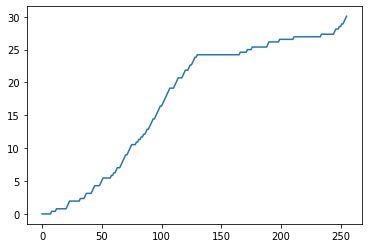

In [10]:
# plot the accuracy values
import matplotlib.pyplot as plt
plt.plot(acc_vals)

-3.4028235e+38
3.4028235e+38
1e-45
-1e-45
0.0


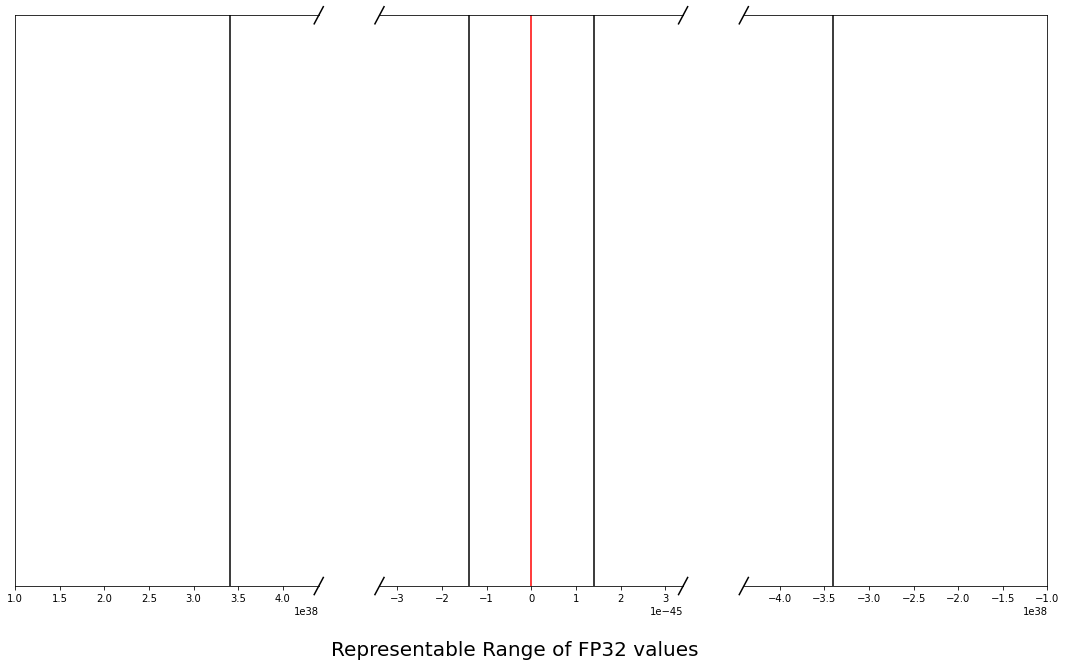

In [78]:
import matplotlib.pyplot as plt
import numpy as np
# get the minimum FP32 value
min_fp32 = np.finfo(np.float32).min
print(min_fp32)
# get the maximum FP32 value
max_fp32 = np.finfo(np.float32).max
print(max_fp32)
# get the minimum positive FP32 value
min_pos_fp32 = np.nextafter(np.float32(0), np.float32(1))
print(min_pos_fp32)
# get the minimum negative FP32 value
min_neg_fp32 = np.nextafter(np.float32(0), np.float32(-1))
print(min_neg_fp32)
zero_fp32 = np.float32(0)
print(zero_fp32)


# plot vertical lines for min, max, min_pos, min_neg, and zero
# break the x axis where no data is plotted
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
# make figure larger
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
ax1.axvline(x=min_fp32, color='black', linestyle='-')
ax1.axvline(x=max_fp32, color='black', linestyle='-')
ax1.axvline(x=min_pos_fp32, color='black', linestyle='-')
ax1.axvline(x=min_neg_fp32, color='black', linestyle='-')
ax1.axvline(x=zero_fp32, color='red', linestyle='-')

ax2.axvline(x=min_fp32, color='black', linestyle='-')
ax2.axvline(x=max_fp32, color='black', linestyle='-')
ax2.axvline(x=min_pos_fp32, color='black', linestyle='-')
ax2.axvline(x=min_neg_fp32, color='black', linestyle='-')
ax2.axvline(x=zero_fp32, color='red', linestyle='-')

ax3.axvline(x=min_fp32, color='black', linestyle='-')
ax3.axvline(x=max_fp32, color='black', linestyle='-')
ax3.axvline(x=min_pos_fp32, color='black', linestyle='-')
ax3.axvline(x=min_neg_fp32, color='black', linestyle='-')
ax3.axvline(x=zero_fp32, color='red', linestyle='-')

# zoom-in / limit the view to different portions of the data
ax1.set_xlim(1e38, max_fp32 + 1e38)  # largest FP32 value
ax2.set_xlim(min_neg_fp32 - 2e-45, min_pos_fp32 + 2e-45)  # smallest FP32 values
ax3.set_xlim(min_fp32 - 1e38, -1e38)  # smallest FP32 values

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)


ax1.yaxis.tick_left()
# ax.tick_params(labelright='off')  # don't put tick labels at the top
ax2.yaxis.tick_right()
# ax2.tick_params(labelright='off')
ax3.yaxis.tick_left()
# ax3.tick_params(labelright='off')
# remove y ticks from all but the leftmost plot
ax1.yaxis.tick_left()
ax2.set_yticks([])
ax2.yaxis.tick_left()
ax3.yaxis.tick_left()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)
ax2.plot((1-d,1+d), (1-d,1+d), **kwargs)
ax2.plot((1-d,1+d), (-d,+d), **kwargs)

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d), (1-d,1+d), **kwargs)
ax3.plot((-d,+d), (-d,+d), **kwargs)

# set title at bottom of figure
fig.text(0.5, 0.04, 'Representable Range of FP32 values', ha='center', va='center', fontsize=20)

plt.show()

In [93]:
# get the minimum FP64 value
min_fp64 = np.finfo(np.float64).min 
print(min_fp64)
# get the maximum FP64 value
max_fp64 = np.finfo(np.float64).max 
print(max_fp64)
# get the minimum positive FP64 value
min_pos_fp64 = np.nextafter(np.float64(0), np.float64(1)) 
print(min_pos_fp64)
# get the minimum negative FP64 value
min_neg_fp64 = np.nextafter(np.float64(0), np.float64(-1)) 
print(min_neg_fp64)
zero_fp64 = np.float64(0)
print(zero_fp64)

-1.7976931348623157e+308
1.7976931348623157e+308
5e-324
-5e-324
0.0


-1.7976931348623156e+270
1.7976931348623156e+270
0.0
-0.0
0.0


Text(0.5, 0.04, 'Representable Range of FP64 values')

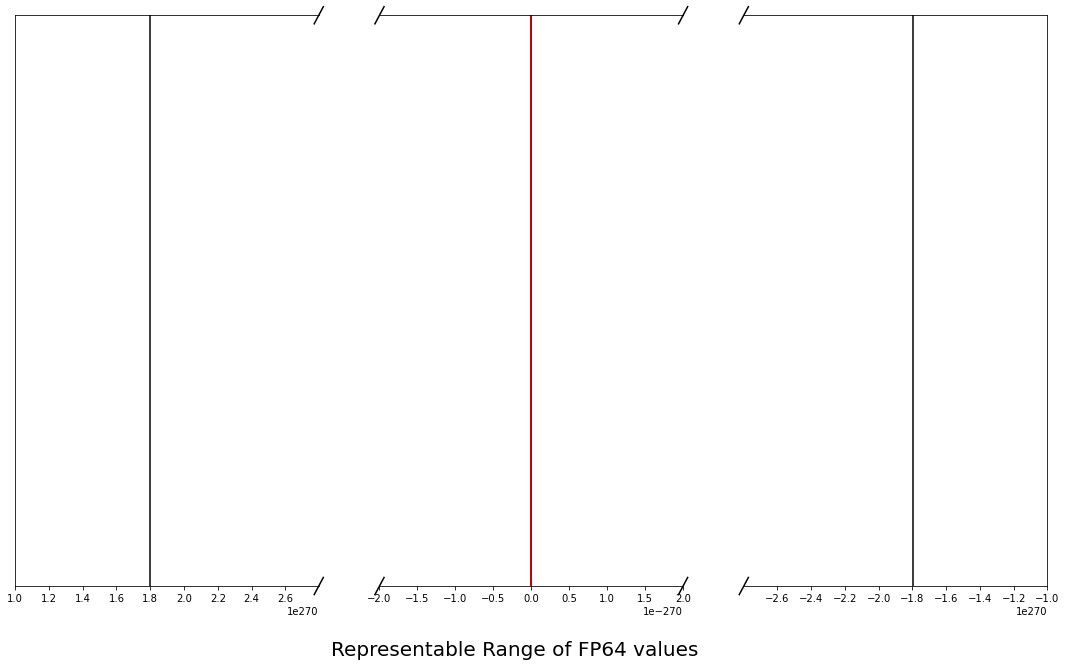

In [92]:
# get the minimum FP64 value
min_fp64 = np.finfo(np.float64).min * 1e-38
print(min_fp64)
# get the maximum FP64 value
max_fp64 = np.finfo(np.float64).max * 1e-38
print(max_fp64)
# get the minimum positive FP64 value
min_pos_fp64 = np.nextafter(np.float64(0), np.float64(1)) * 1e-38
print(min_pos_fp64)
# get the minimum negative FP64 value
min_neg_fp64 = np.nextafter(np.float64(0), np.float64(-1)) * 1e-38
print(min_neg_fp64)
zero_fp64 = np.float64(0)
print(zero_fp64)

# plot vertical lines for min, max, min_pos, min_neg, and zero
# break the x axis where no data is plotted
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
# make figure larger
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
ax1.axvline(x=min_fp64, color='black', linestyle='-')
ax1.axvline(x=max_fp64, color='black', linestyle='-')
ax1.axvline(x=min_pos_fp64, color='black', linestyle='-')
ax1.axvline(x=min_neg_fp64, color='black', linestyle='-')
ax1.axvline(x=zero_fp64, color='red', linestyle='-')

ax2.axvline(x=min_fp64, color='black', linestyle='-')
ax2.axvline(x=max_fp64, color='black', linestyle='-')
ax2.axvline(x=min_pos_fp64, color='black', linestyle='-')
ax2.axvline(x=min_neg_fp64, color='black', linestyle='-')
ax2.axvline(x=zero_fp64, color='red', linestyle='-')

ax3.axvline(x=min_fp64, color='black', linestyle='-')
ax3.axvline(x=max_fp64, color='black', linestyle='-')
ax3.axvline(x=min_pos_fp64, color='black', linestyle='-')
ax3.axvline(x=min_neg_fp64, color='black', linestyle='-')
ax3.axvline(x=zero_fp64, color='red', linestyle='-')

# zoom-in / limit the view to different portions of the data
ax1.set_xlim(1e270, max_fp64 + 1e270)  # largest FP64 value
ax2.set_xlim(min_neg_fp64 - 2e-270, min_pos_fp64 + 2e-270)  # smallest FP64 values
ax3.set_xlim(min_fp64 - 1e270, -1e270)  # smallest FP64 values

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax1.yaxis.tick_left()
# ax.tick_params(labelright='off')  # don't put tick labels at the top
ax2.yaxis.tick_right()
# ax2.tick_params(labelright='off')
ax3.yaxis.tick_left()
# ax3.tick_params(labelright='off')
# remove y ticks from all but the leftmost plot
ax1.yaxis.tick_left()
ax2.set_yticks([])
ax2.yaxis.tick_left()
ax3.yaxis.tick_left()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)
ax2.plot((1-d,1+d), (1-d,1+d), **kwargs)
ax2.plot((1-d,1+d), (-d,+d), **kwargs)

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d), (1-d,1+d), **kwargs)
ax3.plot((-d,+d), (-d,+d), **kwargs)


# set title at bottom of figure
fig.text(0.5, 0.04, 'Representable Range of FP64 values', ha='center', va='center', fontsize=20)
